In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# !pip install openpyxl

In [ ]:
# !pip install xgboost

In [ ]:
file_path = '/content/drive/MyDrive/Mumbai_City_Dataset/processed_Nsc_data.xlsx'
df = pd.read_excel(file_path)
df.head()

,bhk,area,total_price,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,...,region_Warai,region_Worli,region_kandivali,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,status_Under Construction,age_Resale,age_Unknown
0,3,685,25000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,640,5251000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,610,17300000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,876,5998000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,659,9411000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.drop(columns=['total_price'])
y = df['total_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2354711.72
Mean Squared Error: 43060654890238.59
R² Score: 0.9058


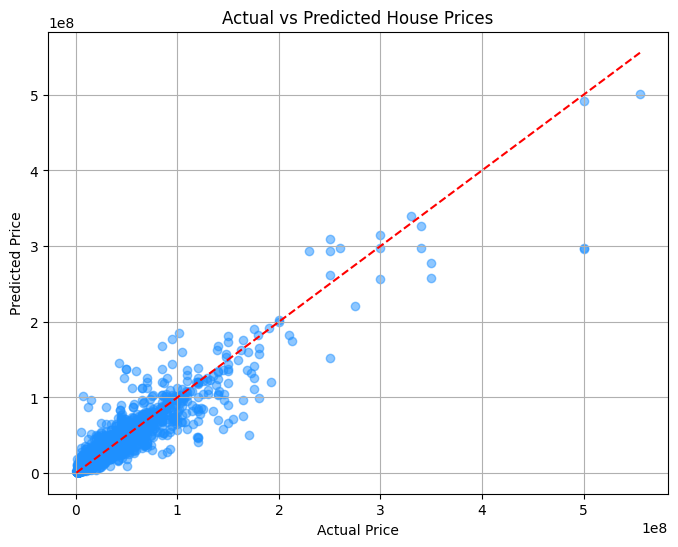

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

**TUNEing Random F**


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_cv = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)

best_rf = rf_cv.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:

y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_rf))
print("Tuned RF R² :", r2_score(y_test, y_pred_rf))

Tuned RF MAE: 2350974.4402498114
Tuned RF MSE: 43395686669233.07
Tuned RF R² : 0.9050401936056901


**XGBoost**

In [ ]:

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

XGBoost MAE: 3310509.45
XGBoost MSE: 54954143905470.15
XGBoost R²: 0.8797
